<a href="https://colab.research.google.com/github/dianakang/K_digital_likelion/blob/master/20201221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.1 빅데이터를 위한 판다스

In [119]:
# 데이터 분석을 위해 가장 먼저 할 일은 "데이터를 불러오는 것"
# 이때, 불러오는 데이터를 '데이터 집합' 혹은 'data set'이라고 한다.

In [120]:
import pandas as pd
# 우리가 이번에 필요한 데이터 집합을 불러오려면 read.csv 메서드(함수)를 사용해야 한다. 이는 기본적으로 쉼표(,)로 열이 구분되어 있다.
# 하지만, 우리가 불러올 데이터는 열이 텝(tab)으로 구분되어 있기 때문에 read_csv 메서드를 호출할 때 이를 미리 알려주어야 한다. 따라서 sep 속성값으로 '\t'를 지정한다.
df = pd.read_csv('/content/drive/MyDrive/3주차/dataset/gapminder.tsv',sep='\t')

In [121]:
# pandas에서는 데이터를 효율적으로 다루기 위해 '시리즈(Series)'와 '데이터프레임(DataFrame)'이라는 자료형을 사용한다.
# 시리즈(Series)는 열 1개를 의미하고,
# 데이터프레임(DataFrame)은 시리즈들이 각 요소가 되는 딕셔너리이다.

## 5.1.1 불러온 데이터 집합 살펴보기

In [122]:
# read_csv 메서드는 데이터 집합을 읽어 들여와 '데이터프레임'이라는 자료형으로 반환한다.
# 그렇다면 이제 데이터프레임의 데이터를 확인하는 용도로 자주 사용하는 'head 메서드'에 대해 알아보자.
# head 메서드는 데이터프레임에서 가장 앞에 있는 5개의 행을 출력한다.

In [123]:
print(df.head())
# head() 괄호 안에 아무 숫자도 없으면 기본적으로 5개의 행을 출력하며, 다른 숫자를 입력시 그만큼의 행(숫자)을 출력한다.
# 참고로 여기서 df는 위에서 정의했던 pd.read_csv()이다.
# 추가적으로 df.head() 이렇게 괄호가 있으면 '함수 혹은 메서드'라는 것이고, df.shape 이렇게 괄호가 없으면 '속성'이라는 것이다.

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [124]:
# 이번에는 df에 저장된 값이 정말 데이터프레임이라는 자료형인지 확인해볼 것이다.
print(type(df))
# 실행해보면, 판다스의 데이터프레임이라는 것을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>


### (1) 데이터의 크기 살펴보기

In [125]:
# 데이터프레임은 자신이 가지고 있는 데이터의 행과 열의 크기에 대한 정보를 shape이라는 속성에 저장하고 있다.
print(df.shape)
# 1번째 값은 행의 크기이고, 2번째 값은 열의 크기(즉, 변수의 개수)이다.

(1704, 6)


### (2) 데이터의 자료형 살펴보기

In [126]:
# 이번에는 데이터에 어떤 정보가 들어있는지 알아볼 것이다. 먼저 columns속성을 이용해 데이터프레임의 열 이름을 확인할 수 있다.
print(df.columns)
# 해당 데이터를 구성하는 열 이름은 각각 country, continent, year, lifeEXP, pop, gdpPercap이다.
# object == string(문자열)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [127]:
print(df.dtypes)
print(df.info())

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


# 5.2 데이터 추출하기

## 5.2.1 열 단위 데이터 추출하기

In [128]:
# 데이터프레임에서 데이터를 열 단위로 추출하려면 대괄호와 열 이름을 사용해야 한다.
# 열 이름은 꼭 작은따옴표('')를 사용해서 지정해야 하고, 추출한 열은 변수에 저장해서 사용할 수도 있다.
# 이때 1개의 열만 추출하면 '시리즈'를 얻을 수 있고, 2개 이상의 열을 추출하면 '데이터프레임'을 얻을 수 있다.

### (1)  1개의 열 추출 - 시리즈(Series)



In [129]:
country_df = df['country']
print(type(country_df))
# 데이터의 자료형이 시리즈(Series)라는 것을 확인할 수 있다.

<class 'pandas.core.series.Series'>


In [130]:
# 시리즈도 head, tail 메서드를 가지고 있기 때문에 이를 이용해 n개(10개)의 데이터를 출력할 수 있다.
print(country_df.head(10))
print(country_df.tail(10))

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
5    Afghanistan
6    Afghanistan
7    Afghanistan
8    Afghanistan
9    Afghanistan
Name: country, dtype: object
1694    Zimbabwe
1695    Zimbabwe
1696    Zimbabwe
1697    Zimbabwe
1698    Zimbabwe
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [131]:
print(country_df.head())   # 앞 5개 데이터 추출 / 괄호()에 아무 숫자도 적지 않으면 기본적으로 5개
print(country_df.tail())   # 뒤 5개 데이터 추출
# object == string(문자열)

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


### (2) 2개 이상의 열 추출 - 데이터프레임(DataFrame)

In [132]:
subset = df[['country','continent','year']]

In [133]:
print(type(subset))
print()
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


## 5.2.2 행 단위 데이터 추출하기

In [134]:
# 데이터를 행 단위로 추출하려면 loc, iloc 속성을 사용해야 한다.
# loc = '인덱스'를 기준으로 행 데이터 추출
# iloc = '행 번호'를 기준으로 행 데이터 추출

### (1) 인덱스와 행 번호 개념 알아보기

In [135]:
subset = df[['country','continent','year','lifeExp','pop','gdpPercap']]

In [136]:
print(subset.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [137]:
# 가장 왼쪽의 번호(0,1,2,3,4)가 '인덱스'이다.
# 인덱스는 보통 0부터 시작하지만 행 데이터 추가, 삭제되면 언제든지 변할 수 있으며 숫자가 아니라 문자열을 사용할 수도 있다.

In [138]:
# 반면에 행 번호는 데이터의 순서를 따라가기 때문에 정수만으로 데이터를 조회하거나 추출할 수 있으며, 이는 실제 데이터프레임에서는 확인할 수 없는 값이다.
# loc 속성에 대괄호를 이용하여 인덱스를 전달하면 행 데이터를 추출할 수 있다.

### (2) loc 속성으로 행 데이터 추출

In [139]:
# loc 속성은 데이터프레임의 인덱스를 사용하여 데이터를 추출

In [140]:
# 그러면 이제 인덱스가 0인 행 데이터와 99인 행 데이터를 추출해보자.
print(df.loc[0])
print("---------------------------")
print(df.loc[99])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
---------------------------
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [141]:
print(df.loc[0])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object


In [142]:
print(df.loc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


In [143]:
print(df.loc[0])
print(df.loc[1])
print()
print(df.loc[99])
print(df.loc[1703])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [144]:
# 그렇다면 데이터프레임의 '마지막 행 데이터'를 추출하려면 어떻게 해야할까? 
# 그렇다. 마지막 행 데이터의 '인덱스(loc속성)'를 알아내야 한다. 

In [145]:
## 첫번째 방법

In [146]:
number_of_rows = df.shape[0]
print(number_of_rows)

1704


In [147]:
# shape[0]에 행 크기(1704)가 저장되어 있다는 점을 이용하여 마지막 행의 인덱스를 구한다.

In [148]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
print(df.loc[last_row_index])
# shape[0]에서 1을 뺀 값(1704 - 1 = 1703)으로 마지막 행 데이터를 추출한다.

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [149]:
## 두번째 방법

In [150]:
# 데이터프레임의 마지막 행 데이터를 추출하는 또 다른 방법으로는 tail메서드를 사용하는 방법이다.

In [151]:
print(df.tail(n = 1))
# 다음과 같이 tail 메서드의 인자 n에 1을 전달하면 마지막 행의 데이터를 추출할 수 있다.

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [152]:
# 만약 인덱스가 0, 99, 999인 데이터를 한 번에 추출하려면 리스트에 원하는 인덱스를 담아 loc 속성에 전달하면 된다.
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [153]:
# @@@주의@@@ tail 메서드와 loc 속성이 반환하는 자료형은 서로 다르다. 

In [154]:
subject_loc = df.loc[0]
subject_tail = df.tail(1)

## 시리즈(Series) - 시트의 열 1개
print(subject_loc.head())
print("-"*30)

## 데이터프레임(DataFrame) - 데이터의 행, 열 여러 개
print(subject_tail.head())
print("-"*30)

## 데이터의 자료형을 type 메서드로 확인
print(type(subject_loc))       # Series
print(type(subject_tail))      # DataFrame

# loc 속성이 반환한 데이터 자료형은 시리즈이고, tail 메서드가 반환한 데이터 자료형은 데이터프레임이다.

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
Name: 0, dtype: object
------------------------------
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
------------------------------
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### (3) iloc 속성으로 행 데이터 추출

In [155]:
# iloc 속성은 데이터 순서를 의미하는 행 번호를 사용하여 데이터를 추출

In [156]:
print(df.iloc[1])
print("-"*30)
print(df.iloc[99])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object
------------------------------
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [157]:
# iloc 속성은 음수를 사용해도 데이터를 추출할 수 있다!
# cf) loc 속성의 경우, tail함수를 써서 마지막 행 데이터를 추출했음

In [158]:
# 마지막 행 데이터 추출
print(df.iloc[-1])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [159]:
# iloc 속성도 여러 데이터를 한 번에 추출할 수 있다.
# loc 속성을 사용했던 것처럼 원하는 데이터의 행 번호를 리스트에 담아 전달하면 된다.
print(df.iloc[[0,99,999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


## 5.2.3 행과 열 지정하기

In [160]:
# loc, iloc 속성을 좀 더 자유자재로 사용하기 위해서는 추출할 데이터의 행과 열을 지정하는 방법을 알아야 한다.
# 두 속성 모두 추출할 데이터의 행을 먼저 지정하고 그런 다음 열을 지정하는 방법으로 데이터를 추출한다.
# 즉, df.loc[[행],[열]] 이나 df.iloc[[행],[열]]과 같은 방법으로 코드를 작성한다.
# 이때 행과 열을 지정하는 방법은 '슬라이싱 구문을 사용하는 방법'과 'range 메서드를 사용하는 방법'이 있다.

### (1) 슬라이싱 구문으로 데이터 추출하기

In [161]:
# 모든 행(:)의 데이터에 대해 year,pop 열을 추출하는 방법이다.
subset = df.loc[:, ['year','pop']]   # : == 행 / 'year','pop' == 열 
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [162]:
subset = df.iloc[:, [2,4,-1]]  # 열의 경우[2,4,-1] == 두번째, 네번째, 가장 마지막 데이터를 추출하라는 뜻이다. 
print(subset.head())

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


### (2) range 메서드로 데이터 추출하기

In [163]:
# 이번에는 iloc 속성과 파이썬 내장 메서드인 range를 응용하는 방법이다.
# range 메서드는 지정한 구간의 정수 리스트를 반환해준다.
# iloc 속성의 열 지정값에 정수 리스트를 전달해야 한다는 점과 range 메서드의 반환값이 정수 리스트인 점을 이용하여 원하는 데이터를 추출한다.
# range 메서드는 루프의 반복 동작을 제어할 수 있는 제너레이터를 반환 

In [164]:
small_range = list(range(5))
print(small_range)
print(type(small_range))    # 리스트 형태

[0, 1, 2, 3, 4]
<class 'list'>


In [165]:
subset = df.iloc[:, small_range]   # 여기서 small_range는 0,1,2,3,4 -> 즉 0번째 열, 1번째 열, 2번째 열, 3번째 열, 4번째 열 
print(subset.head())

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [166]:
small_range = list(range(3,6))
print(small_range)

[3, 4, 5]


In [167]:
subset = df.iloc[:, small_range]    # 여기서 small_range는 3번째 열, 4번째 열, 5번째 열 
print(subset.head())

   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [168]:
## 슬라이싱 구문과 range 메서드 비교하기

In [169]:
# 슬라이싱 구문
small_range = list(range(0,6,2))   # 범위가 0~5까지 2만큼 건너뛰는 제네레이터 생성
subset = df.iloc[:,small_range]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [170]:
# range 메서드
subset = df.iloc[:, 0:6:2]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [171]:
# 동일한 결과값을 얻고 있음을 알 수 있다.

In [172]:
# -----------------------------------------------

In [173]:
## loc, iloc 속성 자유롭게 사용하기

In [174]:
# iloc 속성으로 0,99,999 번째 행의 0,3,5번째 열 데이터를 추출
print(df.iloc[[0,99,999], [0,3,5]])
# 근데 이렇게 열 지정값을 정수 리스트로 전달하면, 나중에 코드를 볼 때 어떤 데이터인지 파악하기 힘듦

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [175]:
# 그래서 이렇게 열 이름을 전달해주는게 좋음
print(df.loc[[0,99,999], ['country','lifeExp','gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [176]:
# 그러니 큰 규모의 데이터 분석 프로젝트에서는 loc속성이 좀 더 유용하게 사용됨
# loc속성은 인덱스, 즉 무조건 정수(숫자)의 값일 필요가 없으므로... (문자열도 가능하다는 말) 

In [177]:
# 인덱스가 10인 행 부터 13인 행의 country, lifeExp, gdpPercap 열 데이터를 추출
print(df.loc[10:13, ['country','lifeExp','gdpPercap']])

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


# 5.3 인공지능의 기초를 뒷받침하는 통계

## 5.3.1 그룹화한 데이터의 평균 구하기

In [178]:
# lifeExp 열을 연도별로 그룹화하여 평균 계산하기
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [179]:
groupby_year_df = df.groupby('year')
print(type(groupby_year_df))

pandas.core.groupby.generic.DataFrameGroupBy


In [180]:
# 데이터프레임이 저장된 메모리의 위치 파악
print(groupby_year_df)

In [181]:
# 연도별로 그룹화한 lifeExp열 얻기
groupby_year_df_lifeExp = groupby_year_df['lifeExp']
print(type(groupby_year_df_lifeExp))

pandas.core.groupby.generic.SeriesGroupBy


In [182]:
# 각 연도별 lifeExp 열의 평균값 얻기
mean_lifeExp_by_year = groupby_year_df_lifeExp.mean()
print(mean_lifeExp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [183]:
# year, continent 열로 그룹화한 그룹 데이터프레임에서 likeExp, gdpPercap 열만 추출하여 평균값 구하기
multi_group_var = df.groupby(['year','continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


## 5.3.2 그룹화한 데이터 개수 세기

In [184]:
# 데이터의 빈도수를 구할 때는 nunique 메서드를 사용한다.

In [185]:
# continent를 기준으로 데이터프레임을 만들고 country 열만 추출하여 데이터의 빈도수를 계산
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


# 5.4 시각화, 빅데이터를 이해하는 방법

In [186]:
import matplotlib.pyplot as plt

global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()   # 연도를 그룹화하고 lifeExp의 열을 추출하여 평균을 구해라.
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


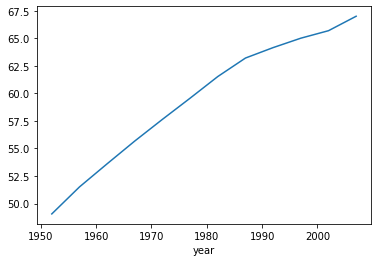

In [187]:
# 행(가로축)이 year이고, 열(세로축)이 lifeExp인 그래프를 그려라.
global_yearly_life_expectancy.plot()
plt.show()